In [8]:
def tikz_convert(ax,
         clean = False, path = "", filename = ""):
    
    mktex = bool(input("Нужно ли отрисовать график? (Enter, если да)"))
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        import tikzplotlib as tikz

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)

        if clean:
            ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num} - 2cm",
                axis_height = "8.5cm")

        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return None

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.388e-17]
       x: [ 1.041e+00]
    nfev: 4
    fjac: [[-1.000e+00]]
       r: [ 1.080e-01]
     qtf: [-2.631e-13]
|    |   volume |      i |
|----|----------|--------|
|  0 |      0   | 0.0009 |
|  1 |      0.1 | 0.0033 |
|  2 |      0.2 | 0.0068 |
|  3 |      0.3 | 0.0092 |
|  4 |      0.4 | 0.0123 |
|  5 |      0.5 | 0.0145 |
|  6 |      0.6 | 0.0167 |
|  7 |      0.7 | 0.0188 |
|  8 |      0.8 | 0.02   |
Нужно ли отрисовать график? (Enter, если да)


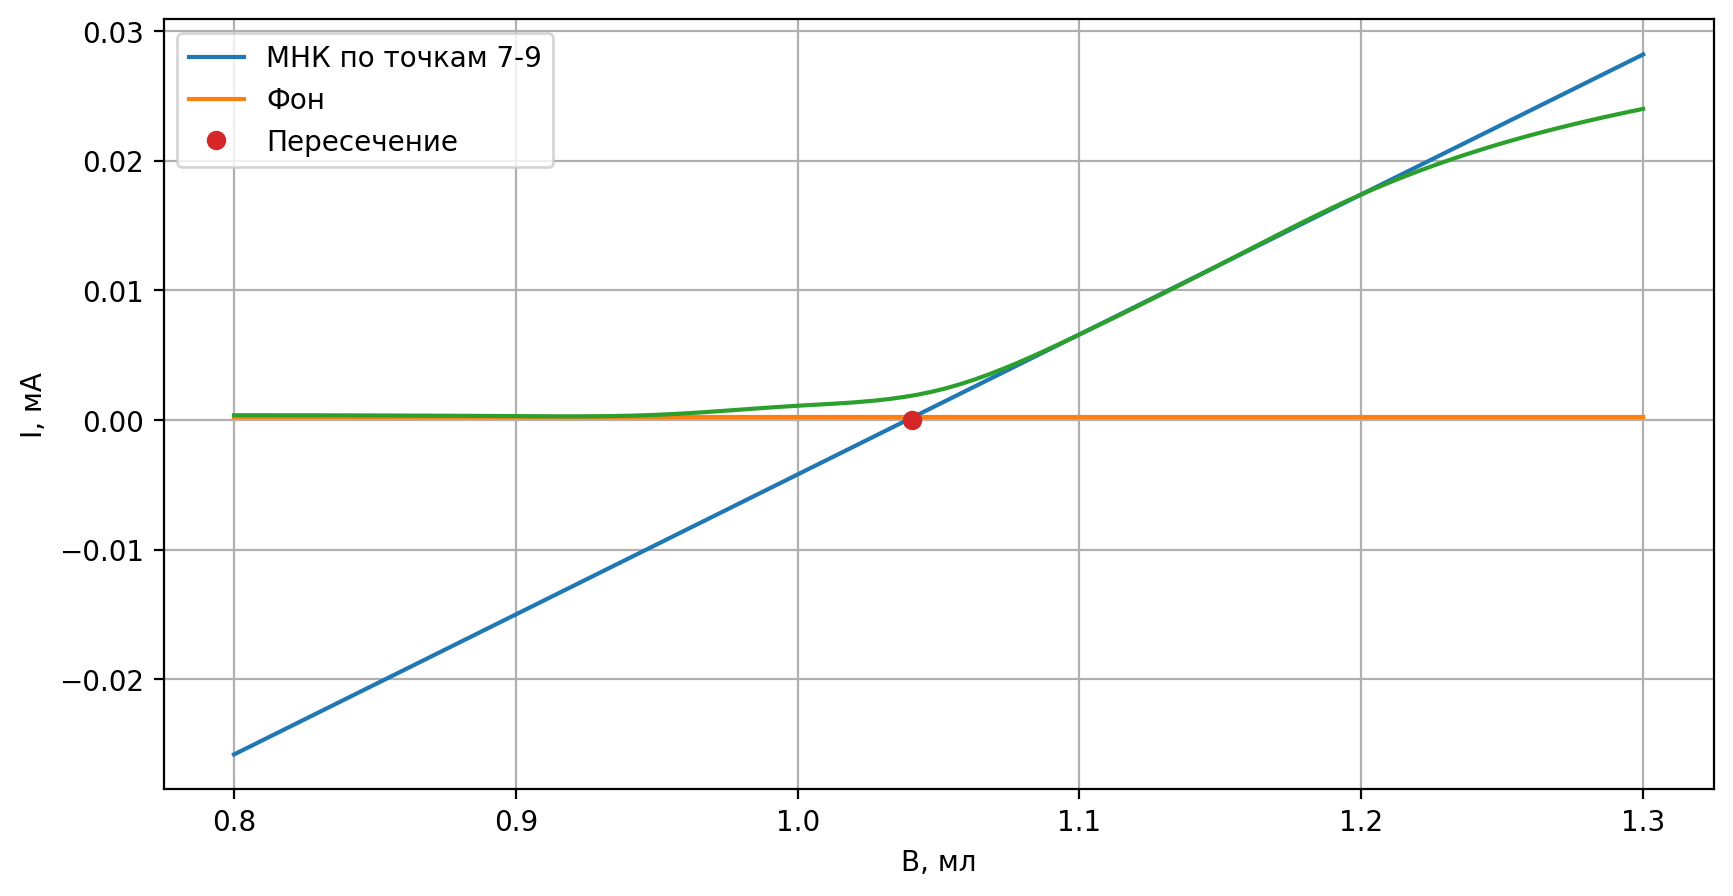

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

from scipy.optimize import curve_fit, root
from scipy.interpolate import CubicSpline

df1_old = {"volume": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
     "i": [0.0003, 0.0068, 0.007, 0.0081, 0.0106, 0.0133, 0.0133]}
df1 = {"volume": [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
     "i":       [0.0009,0.0033, 0.0068, 0.0092, 0.0123, 0.0145, 0.0167, 0.0188, 0.0200]}

df = {"volume": [0,0.6, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.20, 1.30, 1.40, 1.5, 1.6],
      "i":      [0.0002, 0.0002, 0.0003, 0.0004, 0.0011, 0.0023, 0.0066, 0.0120, 0.0174, 0.0240, 0.0280, 0.033,
                0.0360]
     }

df1 = pd.DataFrame(df1)
df = pd.DataFrame(df)

 
left = 6
right = 8
popt, pcov = curve_fit(lambda x, k, b: k*x +b, df["volume"][slice(left,right)], df["i"][slice(left,right)])

left1 = 0
right1 = 2
popt1, pcov1 = curve_fit(lambda x, k, b: k*x +b, df["volume"][slice(left1,right1)], df["i"][slice(left1,right1)])

root = root(lambda x: (popt1[0] - popt[0])*x + popt1[1] - popt[1], 1)
print(root)

spline2 = CubicSpline(df["volume"], df["i"])


x = np.linspace(0.8,1.3,100)
ax = plt.figure(figsize = (10,5),
               dpi = 200)

plt.plot(x,popt[0]*x + popt[1], 
        label = "МНК по точкам 7-9")
plt.plot(x,popt1[0]*x + popt1[1], 
        label = "Фон")
plt.plot(x, spline2(x))
plt.plot(root.x, root.fun, "o", label = "Пересечение")

plt.grid()
plt.xlabel("В, мл")
plt.ylabel("I, мА")
plt.legend()
print(tabulate(df1, headers="keys", tablefmt='github', showindex=True))
plt.plot()

tikz_convert(ax, 
             clean = False, path = "", filename = "amper_titr3.tex")


